In [1]:
from crane_kinematic import Crane
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import copy
import sympy

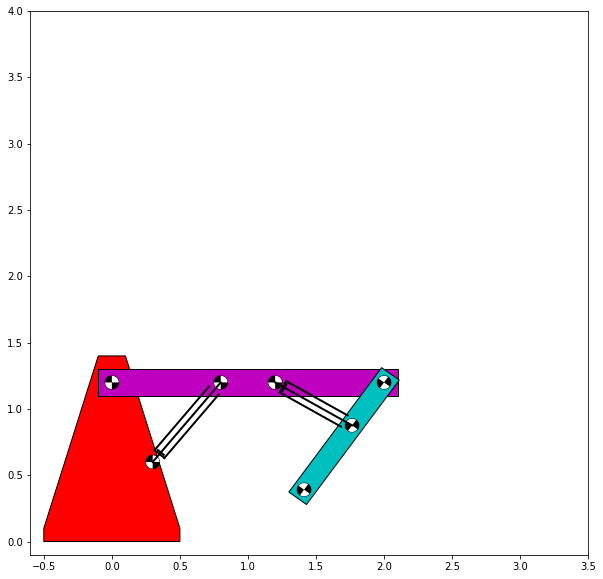

In [2]:
global crane
crane = Crane()

fig = plt.figure(figsize=(10,10)) 
ax = fig.add_subplot(1, 1, 1)
plt.rcParams['keymap.save'].remove('s')
plt.rcParams['keymap.grid'].remove('g')
plt.rcParams['keymap.fullscreen'].remove('f')

theta1_num = 0.0
theta2_num = -0.7*np.pi

ax = crane.plot_crane(ax,theta1_num,theta2_num)
plt.xlim([-0.6,3.5])
plt.ylim([-0.1,4])

def key_press(event,ax):
    wp = event.key
    # sys.stdout.flush()
    q_add,x_add,bool_quit,bool_q_add = crane.evaluate_key_press(wp)

    if bool_q_add:
        crane.add_theta_increment(q_add)
        [theta1_num,theta2_num] = crane.get_last_THETA()
        xy = crane.compute_forward(theta1_num,theta2_num)
        crane.append_X(xy)

    else:
        [theta1_num,theta2_num] = crane.get_last_THETA()

        x_dest = crane.get_last_X()+x_add
        q = crane.compute_inverse(theta1_num,theta2_num,x_dest)
        theta1_num = q[0]
        theta2_num = q[1]
        xy = crane.compute_forward(theta1_num,theta2_num)
        crane.append_X(xy)
        crane.append_THETA(theta1_num,theta2_num)

    [theta1_num,theta2_num] = crane.get_last_THETA()
    X = crane.get_X()
    THETA = crane.get_THETA()

    print('  theta = [{:1.2f}, {:1.2f}],\t position = [{:1.2f}, {:1.2f} ]'.format(180/np.pi*THETA[-1,0],180/np.pi*THETA[-1,1],X[-1,0],X[-1,1]))

    ax.cla()
    ax = crane.plot_crane(ax,theta1_num,theta2_num)
    ax.plot(X[:,0],X[:,1])
    ax.set_xlim([-0.6,3.5])
    ax.set_ylim([-0.1,4])
    fig.canvas.draw()

fig.canvas.mpl_connect('key_press_event', lambda event: key_press(event,ax))
plt.show()